In [66]:
from scipy.optimize import curve_fit
import numpy as np
import pandas 
import csv 
%matplotlib inline
import pylab as pl
pl.rcParams['image.origin'] = 'lower'
pl.style.use('dark_background')

In [67]:
def interpol(x, x_data, y_data):
    f_x = 0
    for ii, x_1 in enumerate(x_data):
        f_i = 1
        for x_2 in x_data:
            if x_2 is not x_1:
                f_i = f_i*(x-x_2)/(x_1-x_2)
        g_i = y_data[ii]
        f_i = g_i*f_i
        f_x += f_i
      
    return f_x

def quartic(x,m,n,exp):
    guess = m*10**(n)
    y = -1/guess*((x-1845)*(x-1911.8))**exp+100
    
    return y 

def step(x):
    f_x = []
    for x_val in x:
        if 1835 <= x_val <= 1857.6:
            f_x.append(100)
        elif 1896.5 <= x_val <= 1922.9:
            f_x.append(100)
        else:
            f_x.append(0)
            
    return f_x

def riemann(x, x_data, y_data):
    f_x = []
    for x_val in x:
        init_min = np.argmin(np.abs(x_val - x_data))
        yval = y_data[init_min]
        f_x.append(yval)
            
    return f_x

def many_small_lines(x, x_data, y_data):
    f_x = []
    restore_x = x_data.copy() 
    pt = 1
    for x_val in x:
        
        if (pt < len(x_data)) and (x_val <= x_data[pt]):
            init_min = pt - 1 
            init_max = pt
            xval_1 = x_data[init_min]
            xval_2 = x_data[init_max]
            yval_1 = y_data[init_min]
            yval_2 = y_data[init_max]
            slope = (yval_2-yval_1)/(xval_2-xval_1)
            yval = slope*(x_val-xval_1)+yval_1
        else:
            init_min = pt  
            init_max = pt + 1
            try:
                xval_1 = x_data[init_min]
                xval_2 = x_data[init_max]
                yval_1 = y_data[init_min]
                yval_2 = y_data[init_max]
                slope = (yval_2-yval_1)/(xval_2-xval_1)
                yval = slope*(x_val-xval_1)+yval_1
                pt += 1 
            except:
                yval = y_data[init_min]
            
        
        f_x.append(yval)
            
    return f_x

In [68]:
#data from website you gave me 
csvFile = pandas.read_csv('MIRIS_paschen_data_filter.csv') 
x_data = []
y_data = []
index = []
x = np.linspace(1800, 1950, 1000)

for ii, xval in enumerate(csvFile['x vals']):
    if xval not in x_data:
        x_data.append(xval)
        index.append(ii)
for ii in index:
    yval = csvFile['y vals'][ii]
    y_data.append(yval)
    
#x_data.pop(50)
#x_data.pop(48)
#x_data.pop(21)
#x_data.pop(10)
#x_data.pop(38)
#x_data.pop(37)
#x_data.pop(35)
#x_data.pop(21)
#x_data.pop(17)
#x_data.pop(16)
#x_data.pop(14)
#x_data.pop(-77)
#x_data.pop(-75)
#x_data.pop(-61)
#x_data.pop(-54)
#x_data.pop(-51)
#x_data.pop(-31)
#x_data.pop(-29)
#x_data.pop(-27)
#x_data.pop(-26)
#x_data.pop(-23)
#x_data.pop(-22)

#y_data.pop(50)
#y_data.pop(48)
#y_data.pop(21)
#y_data.pop(10)
#y_data.pop(38)
#y_data.pop(37)
#y_data.pop(35)
#y_data.pop(21)
#y_data.pop(17)
#y_data.pop(16)
#y_data.pop(14)
#y_data.pop(-77)
#y_data.pop(-75)
#y_data.pop(-61)
#y_data.pop(-54)
#y_data.pop(-51)
#y_data.pop(-31)
#y_data.pop(-29)
#y_data.pop(-27)
#y_data.pop(-26)
#y_data.pop(-23)
#y_data.pop(-22)

#data from http://www.graphreader.com/ which was more useful for visualization 
csvFile = pandas.read_csv('MIRIS_filter_data_updated.csv') 
x_new = []
y_new = []

for xval in csvFile['x vals']:
    x_new.append(xval)
for yval in csvFile['y vals']:
    y_new.append(yval)

(1800, 1950)

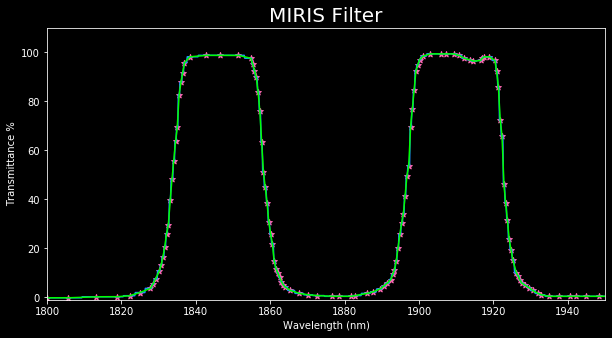

In [72]:
fit = quartic(x, 2.2,21,8)
step_fit = step(x)
riemann_fit = riemann(x, x_data, y_data)
linefit_1 = many_small_lines(x, x_data, y_data)
linefit_2 = many_small_lines(x, x_new, y_new)
pl.figure(figsize=(10,5))
pl.title('MIRIS Filter', fontsize='20')
pl.scatter(x_data, y_data, marker='*', color='hotpink')
pl.plot(x, riemann_fit, color='dodgerblue')
pl.plot(x, linefit_1, color='lime')
#pl.plot(x, linefit_2, color='y')
pl.xlabel('Wavelength (nm)')
pl.ylabel('Transmittance %')
pl.ylim(-1,110)
pl.xlim(1800,1950)